In [30]:
import csv
import pandas as pd
import statsmodels.stats.multicomp as mc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly as py
import ipywidgets as widgets
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
py.offline.init_notebook_mode(connected=True)

In [2]:
data = pd.read_csv('C:/Users/BABlanchard/OneDrive - LSU AgCenter/Documents/ASSCT 2022/384 project/active22.csv')

In [3]:
# Filter the data based on the specified conditions
outfield = data[
    (data['VARIETY'].isin([2001299, 1996540, 2001283, 2009804, 2011183, 2012615, 2012201, 2013739, 2014885, 2014267, 2015306, 2015508])) &
    (data['YEAR'].between(2018, 2022)) &
    (data['STAGE'] == 'OUTFIELD') &
    (data['CROP'].isin([0, 1, 2, 3, 4])) &
    (~data['LOC'].isin(['ARDOYNE']))
]

In [4]:
print(outfield)

       VARIETY      FEMALE        MALE INCLUDE      LOC  A_SERIES  YEAR  \
52392  1996540   LCP86-454   LCP85-384     ALL  ALLAINS      9999  2018   
52393  2001283     L93-365   LCP85-384     ALL  ALLAINS      9999  2018   
52394  2001299     L93-365   LCP85-384     ALL  ALLAINS      9999  2018   
52396  2009804  HOCP02-625  HOCP01-523     ALL  ALLAINS      9999  2018   
52397  2011183  HOCP92-624   LCP85-384     ALL  ALLAINS      9999  2018   
...        ...         ...         ...     ...      ...       ...   ...   
62644  2014885    HO07-613  HOCP04-852     ALL   STJOHN      9999  2022   
62645  2015306    CP83-644     L01-283     ALL   STJOHN      9999  2022   
62646  2015306    CP83-644     L01-283     ALL   STJOHN      9999  2022   
62647  2015508    CP83-644     L01-283     ALL   STJOHN      9999  2022   
62648  2015508    CP83-644     L01-283     ALL   STJOHN      9999  2022   

          STAGE  CROP  REP  T_SPACRE  TRS_TON   TCA  FIBER  MSTWT     POPN  
52392  OUTFIELD     1 

In [5]:
variety_counts = outfield['VARIETY'].value_counts()
print(variety_counts)

VARIETY
2001299    561
2009804    561
2012615    544
2012201    540
2013739    488
1996540    486
2011183    474
2014885    405
2014267    399
2015508    282
2001283    279
2015306    279
Name: count, dtype: int64


In [6]:
# Create a cross-tabulation table
variety_crop_counts = pd.crosstab(outfield['VARIETY'], outfield['CROP'])

print(variety_crop_counts)

CROP       0    1    2   3   4
VARIETY                       
1996540  102  132  144  93  15
2001283   30   63   87  84  15
2001299  153  156  144  93  15
2009804  153  156  144  93  15
2011183   96  126  144  93  15
2012201  152  155  143  78  12
2012615  154  156  144  78  12
2013739  152  156  120  51   9
2014267  152  122   89  30   6
2014885  153  126   90  30   6
2015306  123   90   57   9   0
2015508  123   93   57   9   0


In [22]:
# Define the mapping of numeric VARIETY values to string representations
variety_mapping = {
    '2001283': 'L01-283',
    '2001299': 'L01-299',
    '1996540': 'HOCP96-540',
    '2009804': 'HOCP09-804',
    '2011183': 'L11-183',
    '2012201': 'L12-201',
    '2012615': 'HO12-615',
    '2013739': 'HOCP13-739',
    '2014267': 'L14-267',
    '2014885': 'HOCP14-885',
    '2015306': 'L15-306',
    '2015508': 'HOCP15-508'
}

# Replace numeric VARIETY values with string representations
outfield['VARIETY'].replace(variety_mapping, inplace=True)

# Convert VARIETY column to string type
outfield['VARIETY'] = outfield['VARIETY'].astype(str)

C:\Users\BABlanchard\AppData\Local\Temp\ipykernel_3932\3524487506.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\BABlanchard\AppData\Local\Temp\ipykernel_3932\3524487506.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
# Compute the mean values and standard errors for each VARIETY and CROP
mean_values = outfield.groupby(['VARIETY', 'CROP'])['T_SPACRE'].mean().reset_index()
std_errors = outfield.groupby(['VARIETY', 'CROP'])['T_SPACRE'].sem().reset_index()

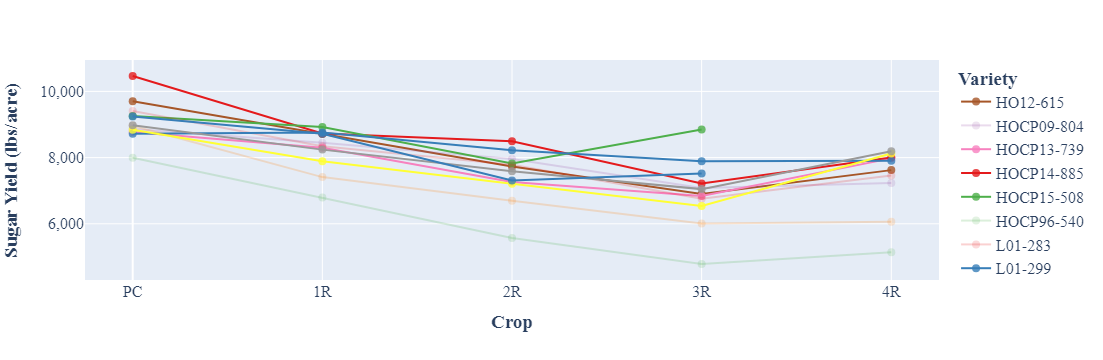

In [24]:
# Define the color palette
palette = sns.color_palette("Set1", n_colors=len(variety_colors))

# Convert seaborn RGB values to rgba format
def seaborn_to_rgba(seaborn_color):
    return f"rgba({seaborn_color[0]*255:.0f}, {seaborn_color[1]*255:.0f}, {seaborn_color[2]*255:.0f}, 0.2)"

# Convert seaborn RGB values to hex format
def seaborn_to_hex(seaborn_color):
    return "#{:02x}{:02x}{:02x}".format(int(seaborn_color[0]*255), int(seaborn_color[1]*255), int(seaborn_color[2]*255))

# Modify the color mapping using the new palette
variety_colors = {
    'L01-283': seaborn_to_rgba(palette[0]),
    'L01-299': seaborn_to_hex(palette[1]),
    'HOCP96-540': seaborn_to_rgba(palette[2]),
    'HOCP09-804': seaborn_to_rgba(palette[3]),
    'L11-183': seaborn_to_rgba(palette[4]),
    'L12-201': seaborn_to_hex(palette[5]),
    'HO12-615': seaborn_to_hex(palette[6]),
    'HOCP13-739': seaborn_to_hex(palette[7]),
    'L14-267': seaborn_to_hex(palette[8]),
    'HOCP14-885': seaborn_to_hex(palette[9]),
    'L15-306': seaborn_to_hex(palette[10]),
    'HOCP15-508': seaborn_to_hex(palette[11]),
}
# Create the line plot
fig = px.line(mean_values, x='CROP', y='T_SPACRE', color='VARIETY', color_discrete_map=variety_colors)
# Customize the lines and markers
fig.update_traces(mode='lines+markers', marker=dict(size=8, opacity=0.8))

# Set the title and axis labels
fig.update_layout(
    xaxis_title='<b>Crop</b>',
    yaxis_title='<b>Sugar Yield (lbs/acre)</b>',
    legend_title="<b>Variety</b>",
    font=dict(family='ITC Franklin Pro'),
)

# Set the x-axis tick values for the specific CROP values
fig.update_xaxes(tickvals=[0, 1, 2, 3, 4], ticktext=['PC', '1R', '2R', '3R', '4R'])
# Set the y-axis tick format to display numbers with commas
fig.update_yaxes(tickformat=",.0f")
# Set the font style for axis and legend labels
fig.update_layout(
    font=dict(
        family='ITC Franklin Pro',
        size=16,
    ),
    legend=dict(
        font=dict(
            family='ITC Franklin Pro',
            size=16,
        )
    )
)
    
# Show the plot
fig.show()

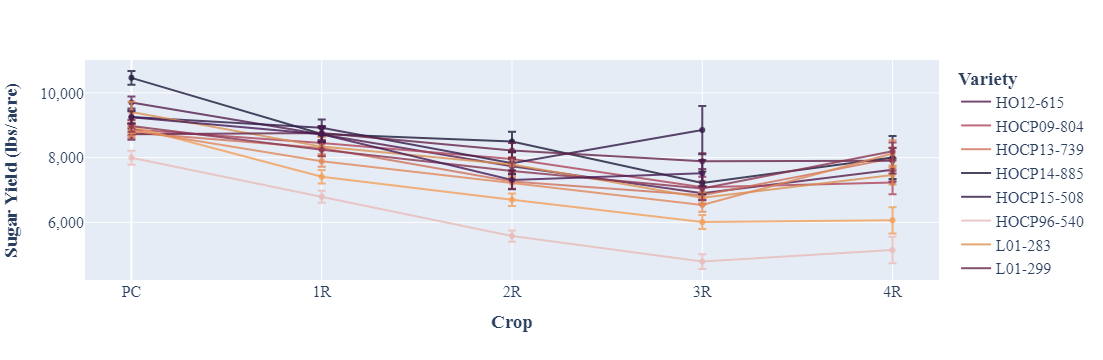

In [25]:
# Modify the color mapping using the new palette
variety_colors = {
    'L01-283': 'rgba(221, 145, 82, 0.8)',
    'L01-299': 'rgba(102, 37, 73, 0.8)',
    'HOCP96-540': 'rgba(232, 188, 185, 0.8)',
    'HOCP09-804': 'rgba(174, 69, 90, 0.8)',
    'L11-183': 'rgba(243, 159, 90, 0.8)',
    'L12-201': 'rgba(226, 137, 90, 0.8)',
    'HO12-615': 'rgba(86, 31, 78, 0.8)',
    'HOCP13-739': 'rgba(209, 114, 90, 0.8)',
    'L14-267': 'rgba(138, 53, 82, 0.8)',
    'HOCP14-885': 'rgba(29, 26, 57, 0.8)',
    'L15-306': 'rgba(69, 25, 82, 0.8)',
    'HOCP15-508': 'rgba(49, 26, 70, 0.8)',
}

# Create the line plot
fig = px.line(mean_values, x='CROP', y='T_SPACRE', color='VARIETY', color_discrete_map=variety_colors)
# Add dots at each mean value with error bars
for i, row in mean_values.iterrows():
    variety = row['VARIETY']
    crop = row['CROP']
    mean_value = row['T_SPACRE']
    std_error = std_errors[(std_errors['VARIETY'] == variety) & (std_errors['CROP'] == crop)]['T_SPACRE'].values[0]
    color = variety_colors[str(variety)]  # Convert variety to string and get the color

    fig.add_trace(go.Scatter(
        x=[crop],
        y=[mean_value],
        mode='markers',
        marker=dict(color=color),
        error_y=dict(
            type='data',
            symmetric=True,
            array=[std_error],
            color=color
        ),
        showlegend=False
    ))
# Set the title and axis labels
fig.update_layout(
    xaxis_title='<b>Crop</b>',
    yaxis_title='<b>Sugar Yield (lbs/acre)</b>',
    legend_title="<b>Variety</b>",
    font=dict(family='ITC Franklin Pro'),
)

# Set the x-axis tick values for the specific CROP values
fig.update_xaxes(tickvals=[0, 1, 2, 3, 4], ticktext=['PC', '1R', '2R', '3R', '4R'])
# Set the y-axis tick format to display numbers with commas
fig.update_yaxes(tickformat=",.0f")
# Set the font style for axis and legend labels
fig.update_layout(
    font=dict(
        family='ITC Franklin Pro',
        size=16,
    ),
    legend=dict(
        font=dict(
            family='ITC Franklin Pro',
            size=16,
        )
    )
)
    
# Show the plot
fig.show()


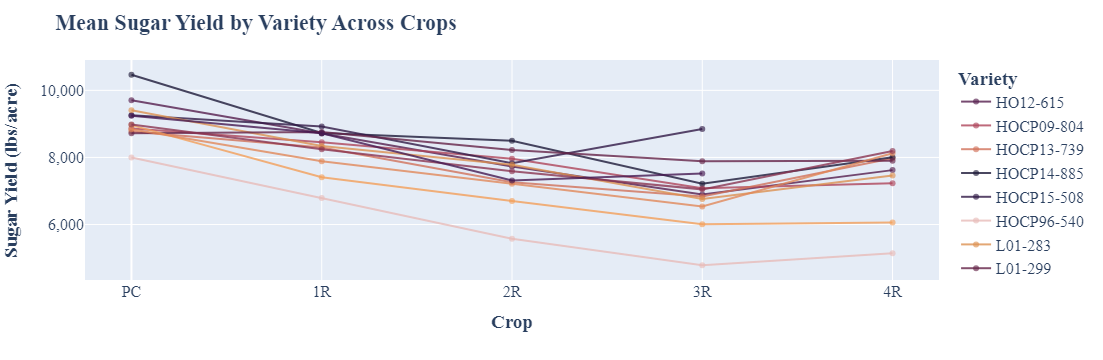

In [26]:
import plotly.graph_objects as go

# Modify the color mapping using the new palette
variety_colors = {
    'L01-283': 'rgba(221, 145, 82, 0.8)',
    'L01-299': 'rgba(102, 37, 73, 0.8)',
    'HOCP96-540': 'rgba(232, 188, 185, 0.8)',
    'HOCP09-804': 'rgba(174, 69, 90, 0.8)',
    'L11-183': 'rgba(243, 159, 90, 0.8)',
    'L12-201': 'rgba(226, 137, 90, 0.8)',
    'HO12-615': 'rgba(86, 31, 78, 0.8)',
    'HOCP13-739': 'rgba(209, 114, 90, 0.8)',
    'L14-267': 'rgba(138, 53, 82, 0.8)',
    'HOCP14-885': 'rgba(29, 26, 57, 0.8)',
    'L15-306': 'rgba(69, 25, 82, 0.8)',
    'HOCP15-508': 'rgba(49, 26, 70, 0.8)',
}

# Create the line plot
fig = px.line(mean_values, x='CROP', y='T_SPACRE', color='VARIETY', color_discrete_map=variety_colors)
fig.update_traces(mode='lines+markers', marker=dict(size=6, opacity=0.8))


# Set the title and axis labels
fig.update_layout(
    title="<b>Mean Sugar Yield by Variety Across Crops</b>",
    xaxis_title='<b>Crop</b>',
    yaxis_title='<b>Sugar Yield (lbs/acre)</b>',
    legend_title="<b>Variety</b>",
    font=dict(family='ITC Franklin Pro'),
)

# Set the x-axis tick values for the specific CROP values
fig.update_xaxes(tickvals=[0, 1, 2, 3, 4], ticktext=['PC', '1R', '2R', '3R', '4R'])
# Set the y-axis tick format to display numbers with commas
fig.update_yaxes(tickformat=",.0f")
# Set the font style for axis and legend labels
fig.update_layout(
    font=dict(
        family='ITC Franklin Pro',
        size=16,
    ),
    legend=dict(
        font=dict(
            family='ITC Franklin Pro',
            size=16,
        )
    )
)
    
# Show the plot
fig.show()

In [33]:
import plotly.plotly as py
import plotly.graph_objs as go

# Assuming you have defined 'fig' as your plot earlier in your code

# Upload and display the plot on Chart Studio
plot_url = py.plot(fig, filename='Outfield_Lineplot')


ImportError: 
The plotly.plotly module is deprecated,
please install the chart-studio package and use the
chart_studio.plotly module instead. 


In [13]:
print(plot_url)

NameError: name 'plot_url' is not defined

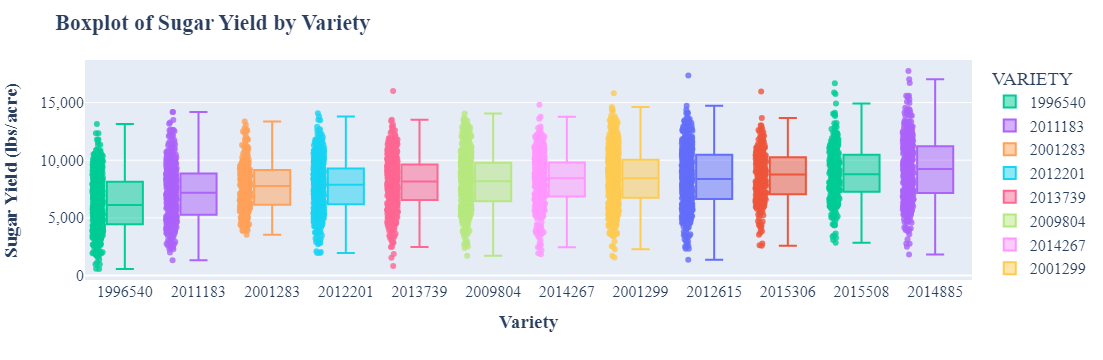

In [14]:
# Create a dictionary of colors
variety_colors = {
    'L01-283': 'rgba(221, 145, 82, 0.4)',
    'L01-299': 'rgba(102, 37, 73, 0.4)',
    'HOCP96-540': 'rgba(232, 188, 185, 0.4)',
    'HOCP09-804': 'rgba(174, 69, 90, 0.4)',
    'L11-183': 'rgba(243, 159, 90, 0.4)',
    'L12-201': 'rgba(226, 137, 90, 0.4)',
    'HO12-615': 'rgba(86, 31, 78, 0.4)',
    'HOCP13-739': 'rgba(209, 114, 90, 0.4)',
    'L14-267': 'rgba(138, 53, 82, 0.4)',
    'HOCP14-885': 'rgba(29, 26, 57, 0.4)',
    'L15-306': 'rgba(69, 25, 82, 0.4)',
    'HOCP15-508': 'rgba(49, 26, 70, 0.4)',
}

# Calculate mean T_SPACRE for each VARIETY
mean_t_spacre = outfield.groupby('VARIETY')['T_SPACRE'].mean().reset_index()
mean_t_spacre = mean_t_spacre.sort_values(by='T_SPACRE')  # Sort by mean T_SPACRE

# Create the boxplot
boxplot_fig = px.box(data_frame=outfield, x='VARIETY', y='T_SPACRE', color='VARIETY', color_discrete_map=variety_colors,
                     category_orders={"VARIETY": mean_t_spacre['VARIETY']})  # Set category order

# Customize the title and axis labels
boxplot_fig.update_layout(
    title="<b>Boxplot of Sugar Yield by Variety</b>",
    xaxis_title="<b>Variety</b>",
    yaxis_title="<b>Sugar Yield (lbs/acre)</b>",
    font=dict(family='ITC Franklin Pro'),
)
# Set the y-axis tick format to display numbers with commas
boxplot_fig.update_yaxes(tickformat=",.0f")
# Set the font style for axis and legend labels
boxplot_fig.update_layout(
    font=dict(
        family='ITC Franklin Pro',
        size=16,
    ),
    legend=dict(
        font=dict(
            family='ITC Franklin Pro',
            size=16,
        )
    )
)

# Set points to display in jitter
boxplot_fig.update_traces(boxpoints='all', jitter=0.3, marker=dict(size=6, opacity=0.8))

# Show the boxplot
boxplot_fig.show()

In [15]:
import chart_studio.plotly as py
import plotly.express as px

# Set your Plotly credentials (replace 'username' and 'api_key' with your actual credentials)
py.sign_in('bablanchard', 'iphJrhBb2mDzWaNVeMK5')


ModuleNotFoundError: No module named 'chart_studio'

In [16]:
# Upload and display the plot on Chart Studio
plot_url = py.plot(boxplot_fig, filename='boxplot_sugar_yield')


TypeError: plot() missing 1 required positional argument: 'kind'

In [17]:
print(plot_url)

NameError: name 'plot_url' is not defined